In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam
import pandas as pd
import pydotplus
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Image_size = [224,224]
valid_path = "/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test"
train_path = "C/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train"

In [ ]:
resnet = ResNet50(include_top=False , input_shape=Image_size+[3],weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
#!pip install pydot

In [ ]:
#!pip install graphviz

In [ ]:
#!pip install pydotplus

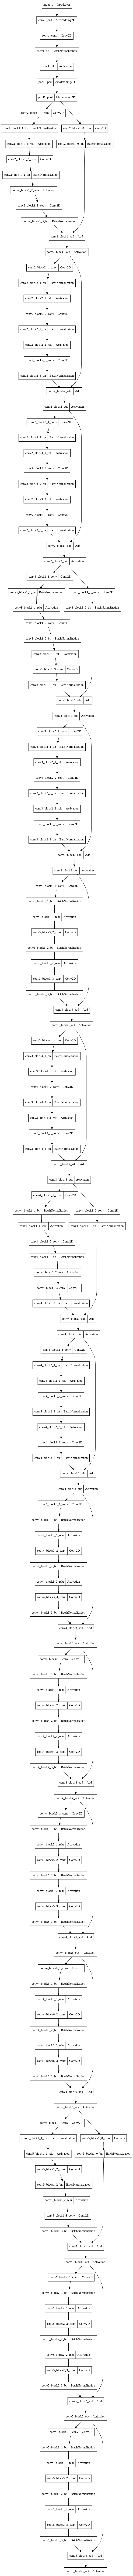

In [ ]:
plot_model(resnet)

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/*")
folders

['/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/mercedes',
 '/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/lamborghini',
 '/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/audi']

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.09301375, 0.5267959 , 0.3801903 ],
         [0.09301375, 0.5267959 , 0.3801903 ],
         [0.09301375, 0.5267959 , 0.3801903 ],
         ...,
         [0.09358412, 0.5261282 , 0.38028768],
         [0.0933982 , 0.52636033, 0.3802414 ],
         [0.09328797, 0.5264864 , 0.38022566]],

        [[0.09301375, 0.5267959 , 0.3801903 ],
         [0.09301375, 0.5267959 , 0.3801903 ],
         [0.0930179 , 0.52679133, 0.38019076],
         ...,
         [0.09358412, 0.5261282 , 0.38028768],
         [0.0933982 , 0.52636033, 0.3802414 ],
         [0.09328797, 0.5264864 , 0.38022566]],

        [[0.0930179 , 0.52679133, 0.38019076],
         [0.0930179 , 0.52679133, 0.38019076],
         [0.09302205, 0.52678674, 0.38019124],
         ...,
         [0.09357995, 0.5261329 , 0.3802872 ],
         [0.0933982 , 0.52636033, 0.3802414 ],
         [0.09328797, 0.5264864 , 0.38022566]],

        ...,

        [[0.09319153, 0.5265922 , 

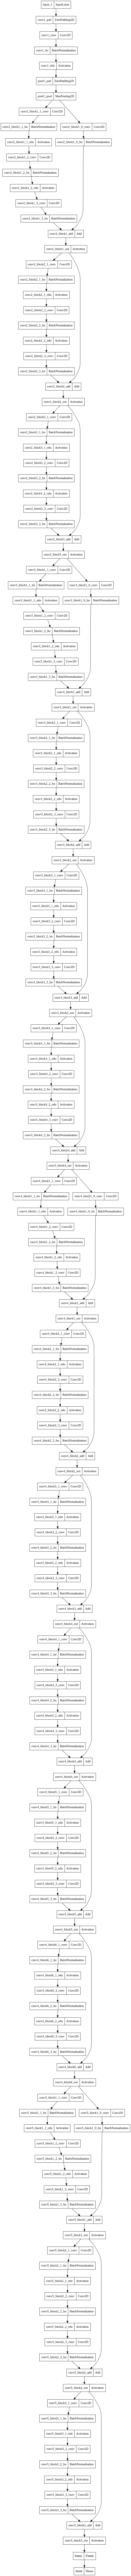

In [ ]:
model = Model(inputs = resnet.input , outputs = prediction)

plot_model(model)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 36s 15s/step - loss: 6.1177 - accuracy: 0.2812 - val_loss: 12.1678 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 14.7450 - accuracy: 0.2969 - val_loss: 5.9428 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 6.5766 - accuracy: 0.3281 - val_loss: 7.6354 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 5.7058 - accuracy: 0.4219 - val_loss: 12.6803 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 9.9893 - accuracy: 0.3906 - val_loss: 9.7721 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 5.4931 - accuracy: 0.3906 - val_loss: 3.9546 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 2.7179 - accuracy: 0.4531 - val_loss: 4.8211 - val_accuracy: 0.5172
Epoch 8/50
2/2 [====================

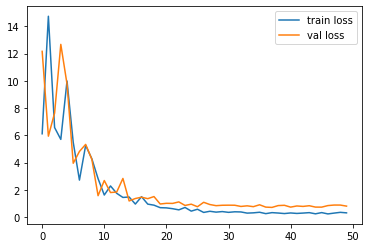

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

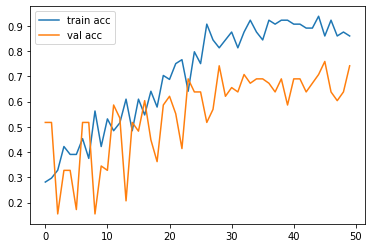

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[2.10569352e-01, 2.65296072e-01, 5.24134576e-01],
       [8.66411775e-02, 6.76260650e-01, 2.37098172e-01],
       [7.54856458e-03, 4.34454739e-01, 5.57996690e-01],
       [1.55127898e-01, 1.26800202e-02, 8.32192123e-01],
       [2.07880270e-02, 8.64844263e-01, 1.14367634e-01],
       [1.83669738e-02, 8.86219501e-01, 9.54134539e-02],
       [2.55727898e-02, 3.98275644e-01, 5.76151609e-01],
       [1.04719147e-01, 4.66627747e-01, 4.28653151e-01],
       [4.13769856e-02, 1.41344666e-02, 9.44488525e-01],
       [5.95252868e-03, 9.21214938e-01, 7.28325099e-02],
       [2.25126669e-02, 1.88155624e-03, 9.75605786e-01],
       [1.38253793e-01, 4.31278497e-01, 4.30467755e-01],
       [5.14292507e-04, 9.82121825e-01, 1.73638370e-02],
       [1.29800237e-05, 8.82837735e-03, 9.91158664e-01],
       [5.65678114e-03, 9.33669865e-01, 6.06732965e-02],
       [8.50382075e-03, 4.56419349e-01, 5.35076916e-01],
       [3.34963016e-02, 3.11368376e-01, 6.55135334e-01],
       [2.08018459e-02, 2.98148

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test/lamborghini/14.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

x =x /255

In [ ]:
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
  preds="The Car IS Audi"
elif preds==2:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

The Car is Lamborghini


In [ ]:
preds

'The Car is Lamborghini'